<a href="https://colab.research.google.com/github/rjsaito/Data-Science-Essentials/blob/master/Probability_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# activate R magic
import rpy2
%reload_ext rpy2.ipython

# Probability

## Conditional Dependence

## Bayes' Rule

# Law of Large Numbers

In probability theory, the law of large numbers (LLN) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

## Weak Law

The weak law of large numbers (also called Khinchin's law) states that the sample average converges in probability towards the expected value

$$
{\displaystyle {\begin{matrix}{}\\{\overline {X}}_{n}\ {\xrightarrow {P}}\ \mu \qquad {\textrm {when}}\ n\to \infty .\\{}\end{matrix}}}
$$
 

That is, for any positive number $ε$,

$$
 \lim _{n\to \infty }\Pr \!\left(\,|{\overline {X}}_{n}-\mu |>\varepsilon \,\right)=0.
$$

## Strong Law

The strong law of large numbers states that the sample average converges almost surely to the expected value


$$
{\displaystyle {\begin{matrix}{}\\{\bar {X}}_{n}\ {\xrightarrow {\text{a.s.}}}\ \mu \qquad {\textrm {when}}\ n\to \infty .\\{}\end{matrix}}}
$$
 
That is,

$$
{\displaystyle \Pr \!\left(\lim _{n\to \infty }{\bar {X}}_{n}=\mu \right)=1.}
$$

\\

What this means is that the probability that, as the number of trials n goes to infinity, the average of the observations converges to the expected value, is equal to one.

# Central Limit Theorem

In probability theory, the central limit theorem (CLT) establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

For example, suppose that a sample is obtained containing a large number of observations, each observation being randomly generated in a way that does not depend on the values of the other observations, and that the arithmetic mean of the observed values is computed. If this procedure is performed many times, the central limit theorem says that the distribution of the average will be closely approximated by a normal distribution. A simple example of this is that if one flips a coin many times the probability of getting a given number of heads in a series of flips will approach a normal curve, with mean equal to half the total number of flips in each series. (In the limit of an infinite number of flips, it will equal a normal curve.)

The central limit theorem has a number of variants. In its common form, the random variables must be identically distributed. In variants, convergence of the mean to the normal distribution also occurs for non-identical distributions or for non-independent observations, given that they comply with certain conditions.

The earliest version of this theorem, that the normal distribution may be used as an approximation to the binomial distribution, is now known as the de Moivre–Laplace theorem.

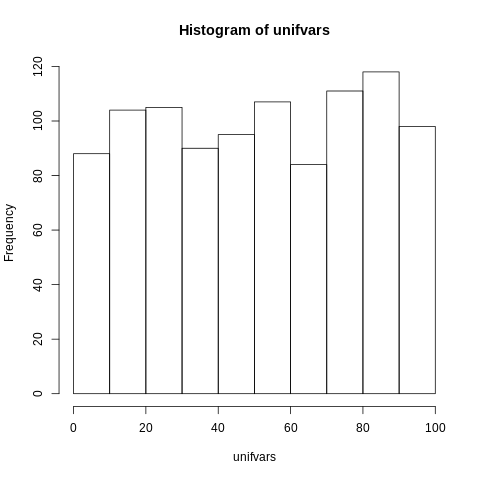

In [0]:
# Original distribution is uniform

%%R

unifvars = runif(1000, min = 0, max = 100)
hist(unifvars)

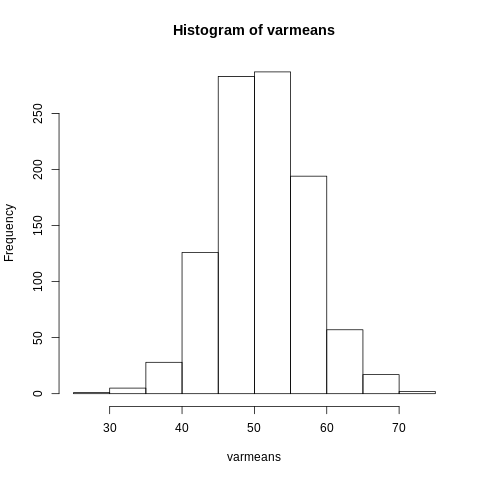

In [0]:
# Take small samples of 20 and get average, 1000 times, end up with normal distribution

%%R

varmeans = replicate(1000, mean(sample(unifvars, 20)))
hist(varmeans)

# Sample Size Calculation

In general, specifying the sample size should have been done prior to running the test.

Sample sizes may be chosen in several different ways:

- experience – A choice of small sample sizes, though sometimes necessary, can result in wide confidence intervals or risks of errors in statistical hypothesis testing.
- using a target variance for an estimate to be derived from the sample eventually obtained, i.e. if a high precision is required (narrow confidence interval) this translates to a low target variance of the estimator.
- using a target for the power of a statistical test to be applied once the sample is collected.
- using a confidence level, i.e. the larger the required confidence level, the larger the sample size (given a constant precision requirement).

Larger sample sizes generally lead to increased precision when estimating unknown parameters. Several fundamental facts of mathematical statistics describe this phenomenon, including the law of large numbers and the central limit theorem.

 $$ n=\frac{2(Z_{\alpha}+Z_{\beta})^2\sigma^2}{\Delta^2} $$

To calculate the required sample size, you’ll need to know four things:

-  **Delta** ($\Delta$): The size of the response you want to detect
- **Variance** ($\sigma^2$): The variance of the response
- **Significance** ($\alpha$): The desired significance level
- **Power** ($\beta$): The desired power

### Delta

Suppose you are comparing a treatment group to a placebo group, and you will be measuring some continuous response variable which, you hope, will be affected by the treatment. We can consider the mean response in the treatment group, μ1, and the mean response in the placebo group, μ2. We can then define $Δ = μ_1 – μ_2$. The smaller the difference you want to detect, the larger the required sample size.

### Variance
Of the four variables that go into the sample size calculation, the variance of the responses can be the most difficult to determine. Usually, before you do your experiment, you don’t know what variance to expect. Investigators often conduct a pilot study to determine the expected variance, or information from a previous published study can be used.

The effect size combines the minimal relevant difference and the variability into one measurement, $Δ/σ$.

### Significance
Significance is equal to $1 – α$, where $α$ is the probability of making a Type 1 Error. That is, alpha represents the chance of a falsely rejecting $H_0$ and picking up a false-positive effect. Alpha is usually set at 0.05, for a 95% significance.

For a two-sided test, we use &Z_α/2& instead of &Z_α$.

### Power
The power of a test is $1-β$, where beta is the probability of a Type 2 error (failing to reject the null hypothesis when the alternative hypothesis is true). In other words, if you have a 20% chance of failing to detect a real difference, then the power of your test is .8.

For example, suppose baseline conversion is 5% and we want to see a detectable relative chance of 20% (+1% absolute change), with 90% power using a two-sided t-test, and a .05 significance level. Using baseline probabilitty of 5%, our variance is $p(1-p) = 0.475$.

In this example, $α=.05$, $β=.10$, $Δ=.1$, and $σ=.25$. $Z_{α/2}=1.96$, and $Z_β=1.28$. So we have: 

$ \\ $

$$
n=\frac{2(1.96+1.28)^2 0.475}{0.1^2}\approx 9,982
$$

or, about 9,982 for each treatment group.

In [0]:
%%R

a = .05
b = .1
baseline = .05
d = .05 * .2
s2 = (baseline * (1- baseline))
# largest case scenario
#s2 = .5 * (1-.5)
za = qnorm(1 - (a/2)) #1.96
zb = qnorm(1 - b) #1.28
n = 2*((za + zb)^2)*s2/(d^2)

n

[1] 9982.052


For a one-sided test

In [0]:
%%R

a = .05
b = .1
baseline = .05
d = .05 * .2
s2 = (baseline * (1- baseline))
# largest case scenario
#s2 = .5 * (1-.5)
za = qnorm(1 - a) #1.65
zb = qnorm(1 - b) #1.28
n = 2*((za + zb)^2)*s2/(d^2)

n

[1] 8135.655


# One Sample t-test

In testing the null hypothesis that the population mean is equal to a specified value $μ_0$, one uses the statistic

$$ {\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}} $$

where $\bar{x}$ is the sample mean, s is the sample standard deviation of the sample and n is the sample size. The degrees of freedom used in this test are $n − 1$. Although the parent population does not need to be normally distributed, the distribution of the population of sample means $\bar {x}$ is assumed to be normal.

By the central limit theorem, if the observations are independent and the second moment exists, then $t$ will be approximately normal $N(0;1)$.

In [0]:
%%R

n = 50
mu = 68

male_heights = round(rnorm(n, mean = 68, sd = 5))

xbar = mean(male_heights)
s = sd(male_heights)

t = (xbar - mu) / (s / sqrt(n))

t


[1] -1.300935


In [0]:
# Verify with function

%%R

t.test(male_heights, mu = 68)


	One Sample t-test

data:  male_heights
t = -1.3009, df = 49, p-value = 0.1994
alternative hypothesis: true mean is not equal to 68
95 percent confidence interval:
 65.91333 68.44667
sample estimates:
mean of x 
    67.18 



# Independent Two-Sample t-tests

## Equal Sample Size, Equal Variance

Given two groups (1, 2), this test is only applicable when:

- the two sample sizes (that is, the number n of participants of each group) are equal;
- it can be assumed that the two distributions have the same variance;

$$t=\frac{(\bar{X_1}-\bar{X_2})}{s_p{\sqrt{\frac{2}{n}}}}, \ \ where \ \ {\displaystyle s_{p}={\sqrt {\frac {s_{X_{1}}^{2}+s_{X_{2}}^{2}}{2}}}} $$ 

Here $s_p$ is the pooled standard deviation for $n = n_1 = n_2$ and $s_{X1}^2$ and $s_{X2}^2$ are the unbiased estimators of the variances of the two samples. The denominator of t is the standard error of the difference between two means.

For significance testing, the degrees of freedom for this test is $2n − 2$ where $n$ is the number of participants in each group.

In [0]:
%%R

n = 50

male_heights = round(rnorm(n, mean = 68, sd = 5))
female_heights = round(rnorm(n, mean = 62, sd = 5))

male_mu = mean(male_heights)
male_sd = sd(male_heights)
female_mu = mean(female_heights)
female_sd = sd(female_heights)

pooled_sd = sqrt((male_sd^2 + female_sd^2)/2)

t = (male_mu - female_mu)/(pooled_sd * sqrt(2 / n))

t

[1] 6.265369


In [0]:
# Verify with function

%%R

t.test(male_heights, female_heights, var.equal = T)


	Two Sample t-test

data:  male_heights and female_heights
t = 6.2654, df = 98, p-value = 9.954e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 4.263568 8.216432
sample estimates:
mean of x mean of y 
    69.18     62.94 



## Equal or Unequal sample size, equal variance

This test is used only when it can be assumed that the two distributions have the same variance. (When this assumption is violated, see below.) Note that the previous formulae are a special case of the formulae below, one recovers them when both samples are equal in size: $n = n_1 = n_2$

The t statistic to test whether the means are different can be calculated as follows:

$$t=\frac{(\bar{X_1}-\bar{X_2})}{s_p{\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}}, \ \ where \ \ { s_{p}={\sqrt { \frac {(n_1 - 1)s_{X_{1}}^{2}+(n_2 - 1)s_{X_{2}}^{2}}{n_1 + n_2 - 2}}}} $$ 


is an estimator of the pooled standard deviation of the two samples: it is defined in this way so that its square is an unbiased estimator of the common variance whether or not the population means are the same. In these formulae, $n_i − 1$ is the number of degrees of freedom for each group, and the total sample size minus two (that is, $n_1 + n_2 − 2$) is the total number of degrees of freedom, which is used in significance testing.

In [0]:
%%R

n1 = 50; n2 = 75

male_heights = round(rnorm(n1, mean = 68, sd = 5))
female_heights = round(rnorm(n2, mean = 62, sd = 5))

male_mu = mean(male_heights)
male_sd = sd(male_heights)
female_mu = mean(female_heights)
female_sd = sd(female_heights)

pooled_sd = sqrt(((n1 - 1)*male_sd^2 + (n2 - 1)*female_sd^2)/(n1 + n2 - 2))

t = (male_mu - female_mu)/(pooled_sd * sqrt((1 / n1) + (1 / n2)))

t

[1] 5.448026


In [0]:
# Verify with function

%%R

t.test(male_heights, female_heights, var.equal = T)


	Two Sample t-test

data:  male_heights and female_heights
t = 5.448, df = 123, p-value = 2.659e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.488944 7.471056
sample estimates:
mean of x mean of y 
    67.36     61.88 



## Equal or unequal sample sizes, unequal variances

This test, also known as Welch's t-test, is used only when the two population variances are not assumed to be equal (the two sample sizes may or may not be equal) and hence must be estimated separately. The t statistic to test whether the population means are different is calculated as:

$$t=\frac{(\bar{X_1}-\bar{X_2})}{s_{\bar{\Delta}}}, \ \ where \ \ { s_{p}={\sqrt { \frac {s_{X_{1}}^{2}}{n_1} + \frac {s_{X_{2}}^{2}}{n_2}}}} $$ 


Here $s_i^2$ is the unbiased estimator of the variance of each of the two samples with $n_i$ = number of participants in group i (1 or 2). Note that in this case $s_{\bar{\Delta}}^2$ is not a pooled variance. For use in significance testing, the distribution of the test statistic is approximated as an ordinary Student's t-distribution with the degrees of freedom calculated using:

$$ \mathrm {d.f.} ={\frac {\left({\frac {s_{1}^{2}}{n_{1}}}+{\frac {s_{2}^{2}}{n_{2}}}\right)^{2}}{{\frac {\left(s_{1}^{2}/n_{1}\right)^{2}}{n_{1}-1}}+{\frac {\left(s_{2}^{2}/n_{2}\right)^{2}}{n_{2}-1}}}} $$

In [0]:
%%R

n1 = 50; n2 = 75
sd1 = 5; sd2 = 4

male_heights = round(rnorm(n1, mean = 68, sd = sd1))
female_heights = round(rnorm(n2, mean = 62, sd = sd2))

male_mu = mean(male_heights)
male_sd = sd(male_heights)
female_mu = mean(female_heights)
female_sd = sd(female_heights)

delta_sd = sqrt((male_sd^2)/n1 + (female_sd^2)/n2)

t = (male_mu - female_mu)/delta_sd

t

[1] 6.676227


In [0]:
%%R

df = (((male_sd^2)/n1 + (female_sd^2)/n2)^2) / ( (((male_sd^2)/n1)^2)/(n1-1) + (((female_sd^2)/n2)^2)/(n2-1) )

df

[1] 99.64269


In [0]:
# Verify with function

%%R

t.test(male_heights, female_heights, var.equal = F)


	Welch Two Sample t-test

data:  male_heights and female_heights
t = 6.6762, df = 99.643, p-value = 1.406e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.917035 7.229631
sample estimates:
mean of x mean of y 
 67.32000  61.74667 



# Dependent t-test for paired samples

This test is used when the samples are dependent; that is, when there is only one sample that has been tested twice (repeated measures) or when there are two samples that have been matched or "paired". This is an example of a paired difference test.

$$ 
{\displaystyle t={\frac {{\bar {X}}_{D}-\mu _{0}}{\frac {s_{D}}{\sqrt {n}}}}.} $$

For this equation, the differences between all pairs must be calculated. The pairs are either one person's pre-test and post-test scores or between pairs of persons matched into meaningful groups (for instance drawn from the same family or age group: see table). The average ($X_D$) and standard deviation ($s_D$) of those differences are used in the equation. The constant μ0 is zero if we want to test whether the average of the difference is significantly different. The degree of freedom used is $n − 1$, where n represents the number of pairs.

In [0]:
%%R

n = 50
mu = 0

score_before = round(rnorm(n, mean = 60, sd = 10))
score_after = score_before + round(rnorm(n, mean = 5, sd = 5))

xd = mean(score_after) - mean(score_before)
sd = sd(score_after - score_before)

t = (xd - mu)/(sd / sqrt(n))

t

[1] 7.540738


In [0]:
# Verify with function

%%R

t.test(score_before, score_after, paired = T)


	Paired t-test

data:  score_before and score_after
t = -7.5407, df = 49, p-value = 9.685e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.20583 -3.59417
sample estimates:
mean of the differences 
                   -4.9 

